# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。


> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要了解的关于 Google 商店中应用的问题，例如，最受欢迎（下载量最高）的 Apps 有什么特征？哪些 App 的评分更高？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：rating与reviews、installs是否存在正相关的关系，排名前十的Genres流派，各年龄段付费与免费APP分布比较，各个category下付费APP的平均价格


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

## 数据评估和清理

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [3]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2019-11-07 03:38:01--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  3.98MB/s    in 2.4s    

2019-11-07 03:38:04 (3.98 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [4]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# TO DO: load the dataset
df=pd.read_csv("googleplaystore.csv")
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


清理数据：去重，查看到除了Rating其他列的NAN值很少，直接删除，Rating用各Category分组后的均值填充

In [7]:
# TO DO: clean the data (optional: only there are problems)
df.drop_duplicates()
df.dropna(axis=0, subset=["Type","Content Rating","Current Ver","Android Ver"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            9360 non-null float64
Reviews           10829 non-null object
Size              10829 non-null object
Installs          10829 non-null object
Type              10829 non-null object
Price             10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null object
Current Ver       10829 non-null object
Android Ver       10829 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [8]:
df.Rating = df.groupby("Category")['Rating'].apply(lambda x: x.fillna(x.mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null object
Size              10829 non-null object
Installs          10829 non-null object
Type              10829 non-null object
Price             10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null object
Current Ver       10829 non-null object
Android Ver       10829 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [9]:
df["Rating"].describe() #查看到Rating 没有异常值

count    10829.000000
mean         4.190524
std          0.480203
min          1.000000
25%          4.047203
50%          4.259664
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

将Reviews转换为数据类型，Installs去掉里面的符号

In [10]:
df["Category"].value_counts()
df.Reviews=pd.to_numeric(df.Reviews)
df.info()
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df["Installs"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null int64
Size              10829 non-null object
Installs          10829 non-null object
Type              10829 non-null object
Price             10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null object
Current Ver       10829 non-null object
Android Ver       10829 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


1000000       1578
10000000      1252
100000        1169
10000         1052
1000           905
5000000        752
100            718
500000         538
50000          478
5000           476
100000000      409
10             385
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: Installs, dtype: int64

查到Price里面有一个美元符号，去掉，再查看数据是否有异常

In [11]:
df.Price=df.Price.apply(lambda x: x.replace('$',''))
df.Price=pd.to_numeric(df.Price)
df["Price"].describe()

count    10829.000000
mean         1.028091
std         15.957778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [12]:
df["Content Rating"].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# 数据探索分析

提取所有的Genres的值

In [13]:
df["Genres"].value_counts()

Tools                                  840
Entertainment                          622
Education                              548
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        390
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      230
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

由于里面某个应用属于多个流派，继续提取出具体流派

In [14]:
df_genre = [i.split(";") for i in df["Genres"]]
df_class = np.unique([j for i in  df_genre for j in i])
len(df_class)


53

新建一个表，填充进去每个具体流派的计数值。效率有点低，电脑运行40多S，以后优化。

In [15]:
count = pd.DataFrame(np.zeros(shape=[10829, 53], dtype="int32"), columns=df_class)
count.head()

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
for i in range(10829):
    count.ix[i, df_genre[i]] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
count.head()

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


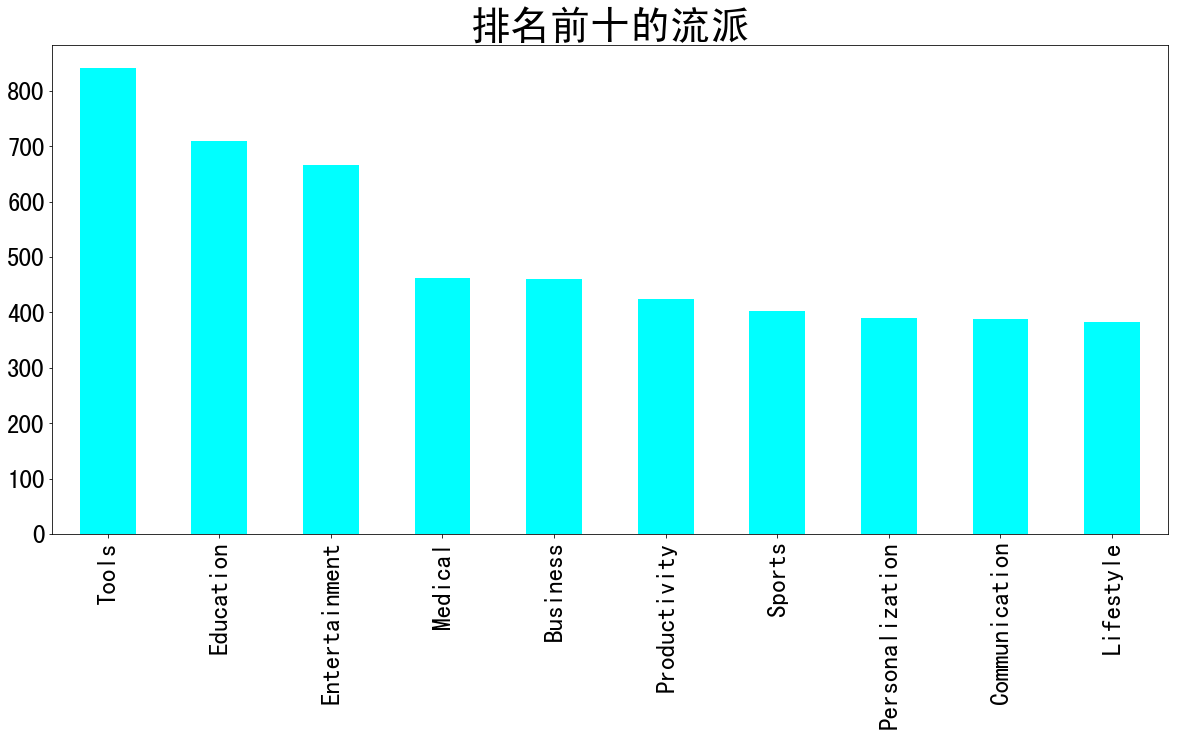

In [18]:
df1=count.sum(axis=0).sort_values(ascending=False).head(10).plot(kind="bar", figsize=(20, 9), fontsize=25, colormap="cool",title="排名前十的流派")
df1.axes.title.set_size(40)

## 数据探索分析

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

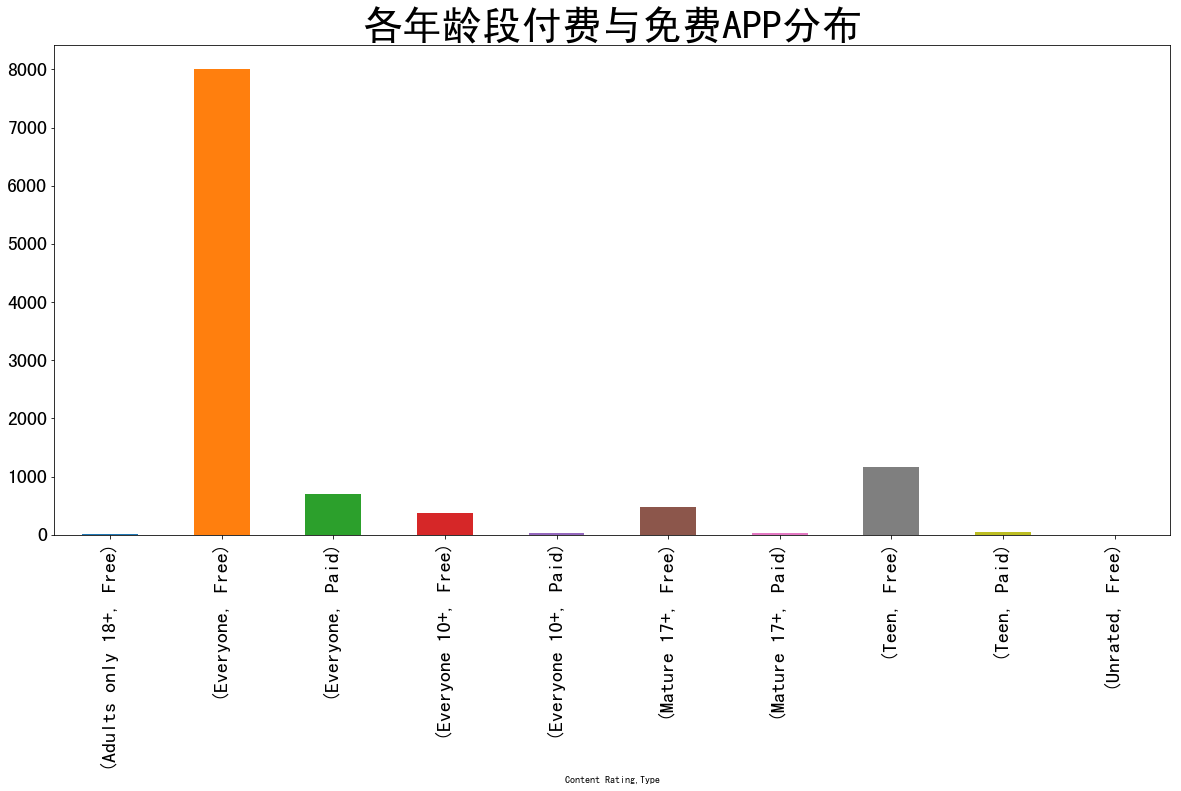

In [19]:
# In exploratory data analysis, please make sure of using statistics and visualizations
df["Type"].value_counts()
df2=df["Type"].groupby(df["Content Rating"]).value_counts()
fig=df2.plot(kind="bar",figsize=(20, 9), fontsize=20,title="各年龄段付费与免费APP分布")
fig.axes.title.set_size(40)

In [20]:
df2

Content Rating   Type
Adults only 18+  Free       3
Everyone         Free    8012
                 Paid     692
Everyone 10+     Free     380
                 Paid      33
Mature 17+       Free     479
                 Paid      20
Teen             Free    1156
                 Paid      52
Unrated          Free       2
Name: Type, dtype: int64

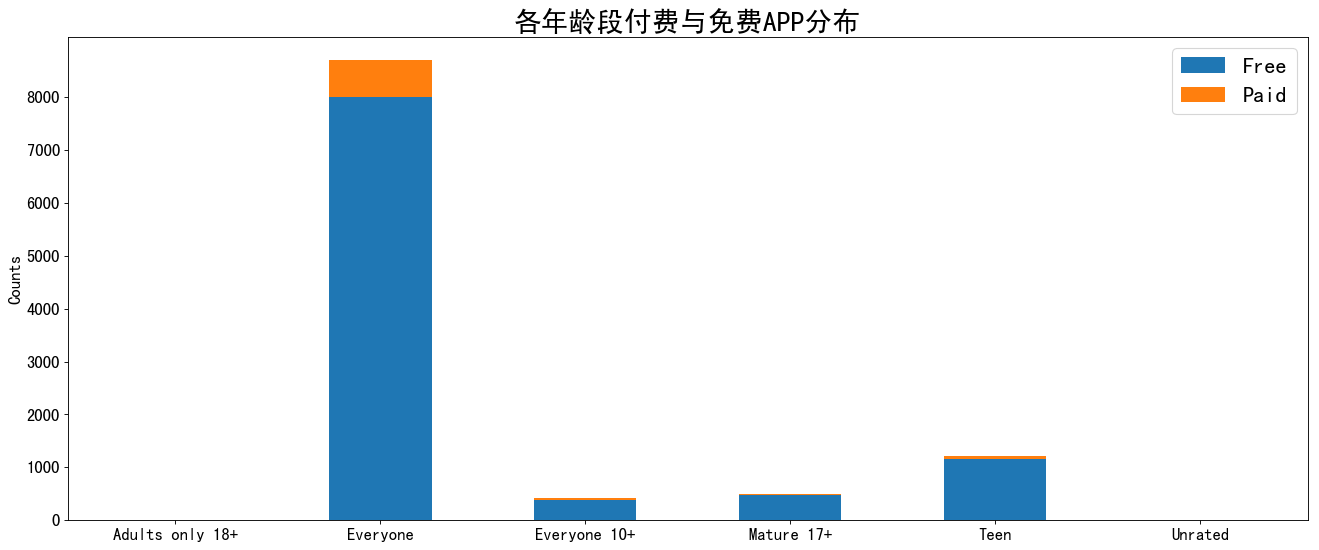

In [21]:
N=6
Free=(3,8012,380,479,1156,2)
Paid=(0,692,33,20,52,0)
ind=np.arange(N)    
width=0.5
plt.figure(figsize=(20, 8), dpi=80)
p1=plt.bar(ind, Free, width)
p2=plt.bar(ind, Paid, width,bottom=Free)
             
plt.ylabel('Counts',fontsize=15)
plt.title('各年龄段付费与免费APP分布',fontsize=25)
plt.xticks(ind, ('Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen','Unrated'),fontsize=15)
plt.yticks(np.arange(0, 9000, 1000),fontsize=15)
plt.legend((p1[0], p2[0]), ('Free', 'Paid'),fontsize=20)

plt.show()

Text(0.5,1,'各目录下平均价格排名')

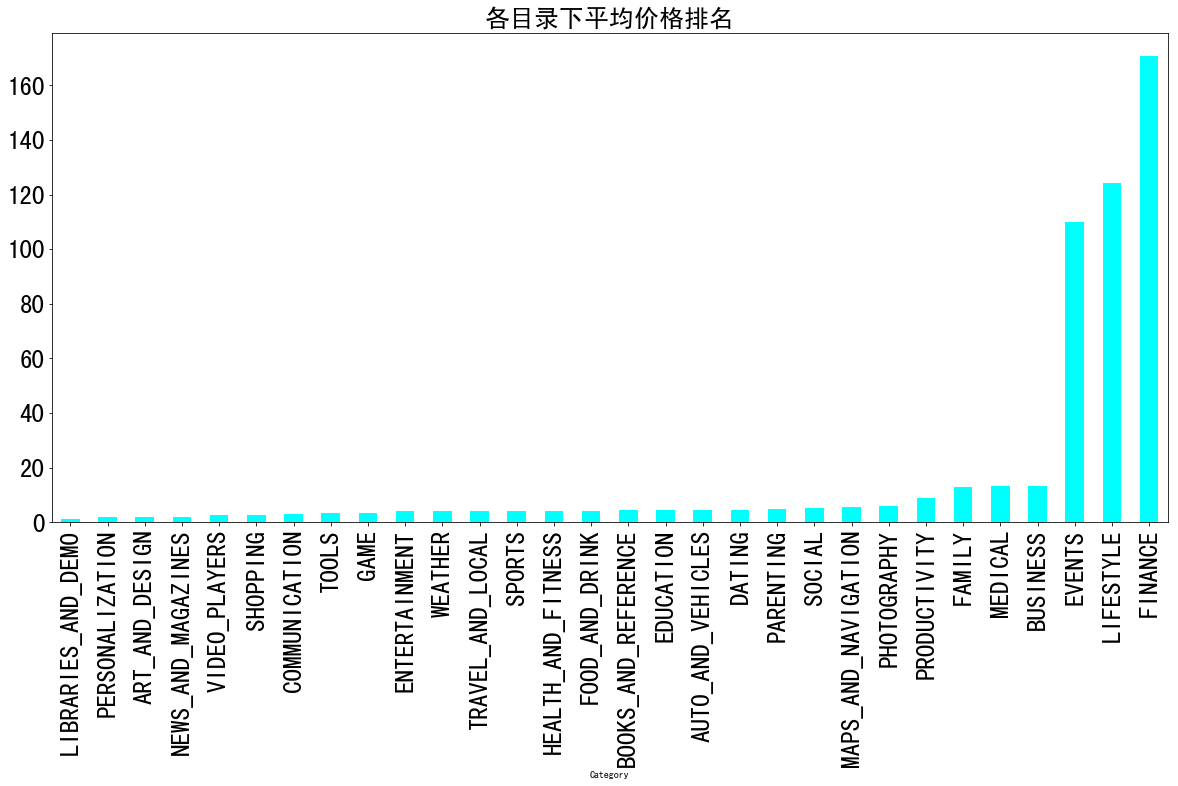

In [22]:
#各个category下付费APP的平均价格
df3=df[df['Type']=='Paid'].groupby("Category")['Price'].mean().sort_values()
df3.plot(kind="bar",figsize=(20, 9), fontsize=25, colormap="cool")
plt.title('各目录下平均价格排名',fontsize=25)

Text(0.5,1,'评分与评论相关性分析')

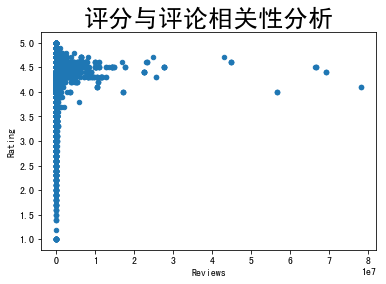

In [23]:
df.plot(x="Reviews", y="Rating", kind="scatter")
plt.title('评分与评论相关性分析',fontsize=25)

Text(0.5,1,'评分与下载量相关性分析')

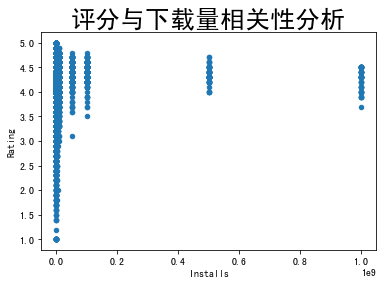

In [24]:
df["Installs"]=pd.to_numeric(df["Installs"])
df.plot(x="Installs", y="Rating", kind="scatter")
plt.title('评分与下载量相关性分析',fontsize=25)

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：rating与reviews、installs是否存在正相关的关系，排名前十的Genres流派，各年龄段付费与免费APP分布比较，各个category下付费APP的平均价格
1,通过Rating与Installs的相关性分析可以看出，两者没有线性关系，但是下载量高的评分集中在3.5分以上，评分较高。下载量中等的评分也较高。下载量低的评分分布没有规律，各种都有。不能判定是否有因果关系，还要综合其他分析。
2，通过Rating与reviews的相关性分析可以看出，两者没有线性关系，但是评论数较多的评分集中在3.5分以上，评分较高。评论低的评分分布没有规律，各种都有。不能判定是否有因果关系，还要综合其他分析。
3，排名前十的Genres流派见图表。
4，市场上APP主要集中在EVERYONE目录下，免费为主。
5，FINANCE，EVENTS，LIFESTYLE三类付费APP的均价明显较高。其他付费APP均价差别不大。


## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
1，数据集不完整，没有近期下载量的数据。这些数据都没有时间信息。有些是历史累计数据，参考意义不大。
2，删除的是很少量的数据，影响不大。填充缺失值用的均值，有一定影响，对均值影响有限。
3，我还想要：近三个月下载量 发行时间 
4，没有，我的结论是不确定的相关性，需要继续探索。

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。